## CollocationNet tutorial

Collocation net allows to find different connections between words based on the collocations each word was in. To do this, first the pairs extracted from the Estonian Koondkorpus were used to divide the words into topics. The distributions of words between different topics are then used to find different connections. For dividing the words between different topics, Latent Dirichlet' Allocation (LDA) was used.

*Note: In order to use Collocation net, you need to have [scikit-learn](https://scikit-learn.org/stable/install.html) installed. To use topic\_words functionality, you also need to install [wordcloud](https://github.com/amueller/word_cloud).*

This tutorial showcases how to use the different functions defined in the collocation net using noun-adjective collocation net as an example. In addition the following collocation net types can be used:

* subject-verb (subject_verb_collocation_net)
* verb-subject (verb_subject_collocation_net)
* object-verb (object_verb_collocation_net)
* verb-object (verb_object_collocation_net)

These can be used by changing the word types in the function names, ie cn.nouns_used_with_adjective would be cn.subjects_used_with_verb for the subject-verb collocation net. The first word in each collocation refers to the word type that was used as documents when training the LDA model.

First let's import the necessary collocation net class and create a collocation net instance.

In [1]:
from estnltk.collocation_net.noun_adjective_collocation_net import NounAdjectiveCollocationNet

In [2]:
cn = NounAdjectiveCollocationNet()

After we have created the collocation net instance, we can obtain different kinds of information regarding the collocations. For example, we can see what words are used together.

For example, if we want to know what kinds of nouns have been described as red (punane), we can use the following function. This finds the top topic for the given adjective and returns the most probable nouns from that topic. 

In [3]:
cn.nouns_used_with_adjective("punane")

['päevakübar',
 'kaelarätt',
 'khmeer',
 'latern',
 'signaalrakett',
 'Marlboro',
 'kirjaklamber',
 'motoroller',
 'viisnurk',
 'tellis']

By default 10 nouns are returned but this can be changed by specifying the number_of_words parameter:

In [4]:
cn.nouns_used_with_adjective("punane", number_of_words=3)

['päevakübar', 'kaelarätt', 'khmeer']

We can obtain the same for nouns:

In [5]:
cn.adjectives_used_with_noun("roos")

['punane',
 'suur',
 'uus',
 'valge',
 'roheline',
 'katkendlik',
 'laineline',
 'horisontaalne',
 'maa-sarnane',
 'vana']

We can find which nouns are similar to a given noun and which adjectives are similar to a given adjective. Similarly, number_of_words can be specified if needed. Similar nouns are found by using the k-nearest neighbours algorithm based on word distributions across different topics obtained from the LDA model.

In [6]:
cn.similar_nouns("esmaspäev")

['teisipäev',
 'kevade',
 'eelarveaasta',
 'kevad',
 'taane',
 'rahandusaasta',
 'hooaeg',
 'lõige',
 'olümpia',
 'eelarveperiood']

In [7]:
cn.similar_adjectives("roosa")

['tulipunane',
 'täidlane',
 'meelas',
 'veripunane',
 'kottis',
 'erkpunane',
 'kärtspunane',
 'lilla',
 'lilleline',
 'lumivalge']

Similarly we can find which other words would be most similar to a list of words.

In [8]:
cn.similar_nouns_for_several(["juuni", "juuli"], number_of_words=5)

['august', 'november', 'märts', 'detsember', 'september']

In [9]:
cn.similar_adjectives_for_several(["ilus", "kole"], number_of_words=5)

['ilusam', 'naljakas', 'õudne', 'efektne', 'võigas']

We can find which topic a word was assigned to. This can only be used for the word type that was used as documents, in this case nouns. Since LDA was used, each word got a probability vector which showed the probability of the word belonging to each topic. After that all words were assigned to the topic that had the highest probability. The topic returned is a list of words whose probability for this topic was the highest. A topic ideally captures words that are somewhat similar, which here means they were used in similar collocations.

In [10]:
cn.topic("esmaspäev")

C:\Programmid\Miniconda3\envs\devel_split\lib\site-packages\estnltk-1.7.0-py3.8-win-amd64.egg\estnltk\collocation_net\base_collocation_net.py:208: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if word in words:


['aasta',
 'nädal',
 'hooaeg',
 'suvi',
 'koosseis',
 'sajand',
 'lõik',
 'talv',
 'riigikogu',
 'sügis',
 'nädalavahetus',
 'reede',
 'neljapäev',
 'lugemine',
 'kevad',
 'tali',
 'lõige',
 'kolmapäev',
 'pühapäev',
 'esmaspäev',
 'laupäev',
 'kevade',
 'teisipäev',
 'majandusaasta',
 'post',
 'tsükkel',
 'olümpia',
 'eelarveaasta',
 'valimiskampaania',
 'jõulud',
 'postitus',
 'kalendriaasta',
 'nädalalõpp',
 'aastavahetus',
 'loendus',
 'finaalturniir',
 'semester',
 'biennaal',
 'detsember',
 'aastanumber',
 'lehenumber',
 'parlamendikoosseis',
 'valitsusaeg',
 'sajandivahetus',
 'kõneleja',
 'külastus',
 'kütteperiood',
 'valitsemisaeg',
 'aruandeaasta',
 'vastamine',
 'maksustamisperiood',
 'kalendrikuu',
 'meil',
 'valiktsükkel',
 'EM-tsükkel',
 'erastamisvoor',
 'kalandusaasta',
 'rahandusaasta',
 'Tšetšeenia',
 'võimuperiood',
 'kesknädal',
 'City',
 'alapeatükk',
 'mail',
 'kevadsuvi']

In addition to the nouns in the topic, we can also find which adjectives describe the topic the most. This returns a wordcloud. The default number_of_words parameter is set as 100, so 100 words will appear in the image. The larger an adjective is, the more descriptive it is of said topic.

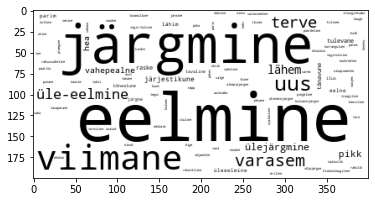

In [11]:
cn.topic_words("esmaspäev")

To find more information regarding how a noun was assigned to different topics, the "characterisation" function can be used. This returns a list of tuples, where the first element in a tuple shows the probability of the noun belonging to said topic and the second element is a list of top adjectives for said topic. This means these adjectives influenced belonging to this topic the most and if a noun was paired with these adjectives often, it was more likely it would be assigned to this topic.

For this function, number_of_topics and number_of_words can be specified to control how many topics and adjectives from each topic get returned. The default for both parameters is 10.

In [12]:
cn.characterisation("esmaspäev", number_of_topics=3, number_of_words=5)

[(0.506, ['eelmine', 'järgmine', 'viimane', 'uus', 'varasem']),
 (0.319, ['järgmine', 'uus', 'segane', 'viimane', 'oluline']),
 (0.037, ['sinine', 'helesinine', 'must', 'punane', 'uus'])]

Another thing the collocation net can be used for is collocation predictions. This can be done in two ways.

First we can give the function a noun and a list of adjectives.

In [13]:
cn.predict_adjective_probabilities("kohv", ["kange", "tugev"])

[('kange', 0.16202089192898697), ('tugev', 0.00012402845209635638)]

This orders the list of adjectives based on how likely they are to form a collocation with the given noun and returns the ordered list with probabilities. From this example we can see that the collocation "kange kohv" is much more likely to occur than "tugev kohv".

We can do the same with an adjective and a list of nouns.

In [14]:
cn.predict_noun_probabilities("kõrge", ["inimene", "hoone"])

[('hoone', 0.009677310575015455), ('inimene', 0.00034731079249077155)]

Secondly we can find the most probable adjectives for a given noun or most probable nouns for a given adjective. The parameters number_of_adjectives or number_of_nouns can be specified. The default value is 10.

In [15]:
cn.predict_adjective_probabilities("kohv", number_of_adjectives=3)

[('maksumärgistamata', 0.17101946243552868),
 ('6mahuprotsendiline', 0.16550957244919495),
 ('kange', 0.16202089192898697)]

In [16]:
cn.predict_noun_probabilities("kange", number_of_nouns=3)

[('alkohol', 0.5966307158521753),
 ('etanoolisisaldus', 0.5501080975982434),
 ('märjuke', 0.487208227829328)]

We can also predict the common adjectives for a list of nouns. This works for the word type used as documents.

In [17]:
cn.predict_adjectives_for_several_nouns(["maja", "korter"])

[('ühetoaline', 0.49942709121883494),
 ('neljatoaline', 0.4985563824589503),
 ('kahetoaline', 0.4979346038378667),
 ('kolmetoaline', 0.49709925166595875),
 ('4toaline', 0.4927163495681243),
 ('1toaline', 0.49156027664598406),
 ('2toaline', 0.4882553236884411),
 ('toaline', 0.4866756081729931),
 ('3toaline', 0.48322838204478713),
 ('kuuetoaline', 0.4784637017544868)]

Lastly we can see if it is likely that a collocation could be used together.

In [18]:
cn.usable_phrase("juuni", "ilus")

True

In [19]:
cn.usable_phrase("inimene", "kõrge")

True